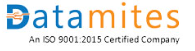

**Project Team ID**: PTID-CDS-OCT-23-1670

**Project id**: PRCP-1002-HandwrittenDigits

**Submitted by**: Anjani Kumar

# **Handwritten Digits Classification**
--------------------------------------

## **Dataset Description**

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It stands for "Modified National Institute of Standards and Technology" and is a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9). It have Training set of 60,000 images and Testing set of 10,000 images.

We have performed Convolution Neural Network (CNN), K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) to classify the hanwritten digits.

-------------------------------
## **Importing Necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report,accuracy_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the MNIST dataset
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()

## **Basic Info**

In [ ]:
print('Xtrain shape:',Xtrain.shape,'&','Ytrain shape:',Ytrain.shape)
print('Xtest shape:',Xtest.shape,'&','Ytest shape:',Ytest.shape)

Xtrain shape: (60000, 28, 28) & Ytrain shape: (60000,)
Xtest shape: (10000, 28, 28) & Ytest shape: (10000,)


Xtrain of 0,1,2 showing: 



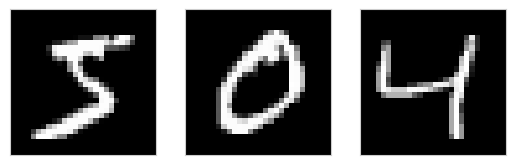


 Ytrain[0],Ytrain[1],Ytrain[2] represent number: 5 0 4


In [ ]:
# Checking the training dataset

print('Xtrain of 0,1,2 showing:','\n')
i=1
for j in range(3):
  plt.subplot(1,3,i)
  plt.imshow(Xtrain[j],cmap='gray')
  plt.xticks([])
  plt.yticks([])
  i+=1
plt.show()
print('\n','Ytrain[0],Ytrain[1],Ytrain[2] represent number:',Ytrain[0],Ytrain[1],Ytrain[2])


Xtest of 0,1,2 showing: 



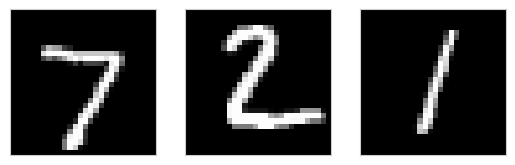


 Ytest[0],Ytest[1],Ytest[2] represent number: 7 2 1


In [ ]:
# Checking the testing dataset

print('Xtest of 0,1,2 showing:','\n')
i=1
for j in range(3):
  plt.subplot(1,3,i)
  plt.imshow(Xtest[j],cmap='gray')
  plt.xticks([])
  plt.yticks([])
  i+=1
plt.show()
print('\n','Ytest[0],Ytest[1],Ytest[2] represent number:',Ytest[0],Ytest[1],Ytest[2])


## **Preprocessing**

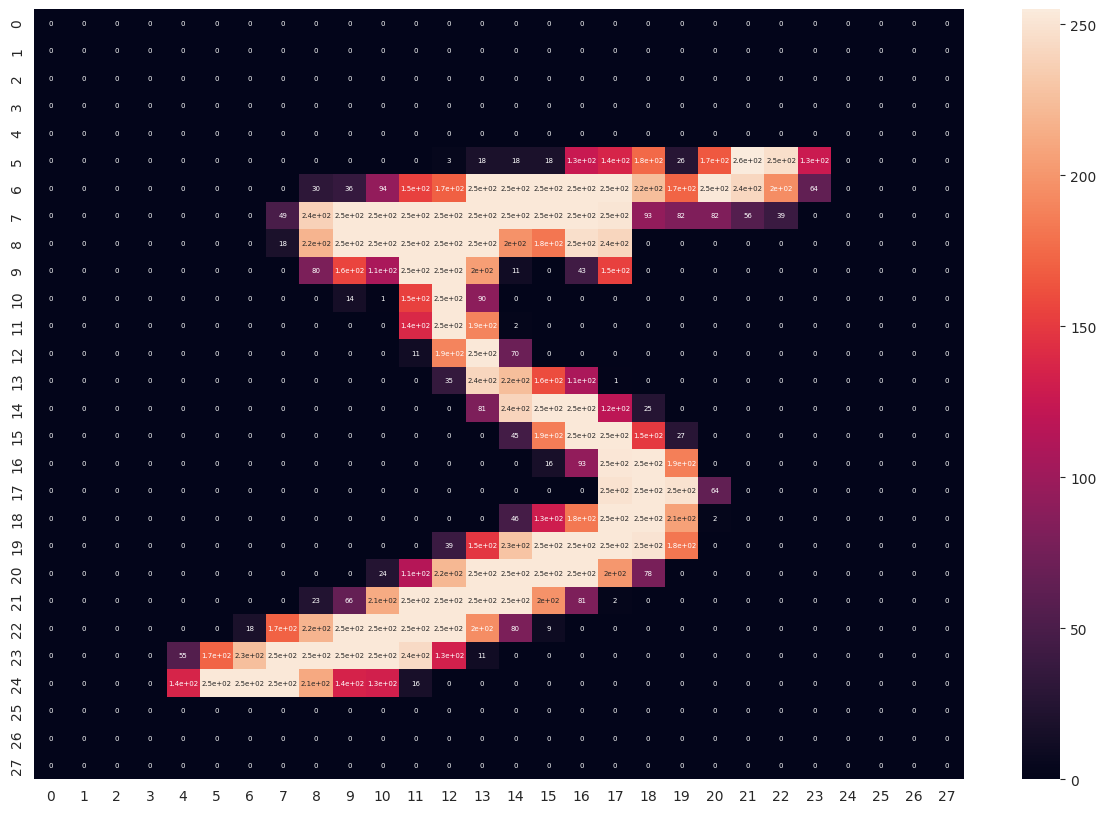

In [ ]:
# Before Scaling, image pixel is very large in number as shown below

plt.figure(figsize=(15,10))
sns.heatmap(Xtrain[0],annot=True,annot_kws={"size": 5})
plt.show()

<Axes: >

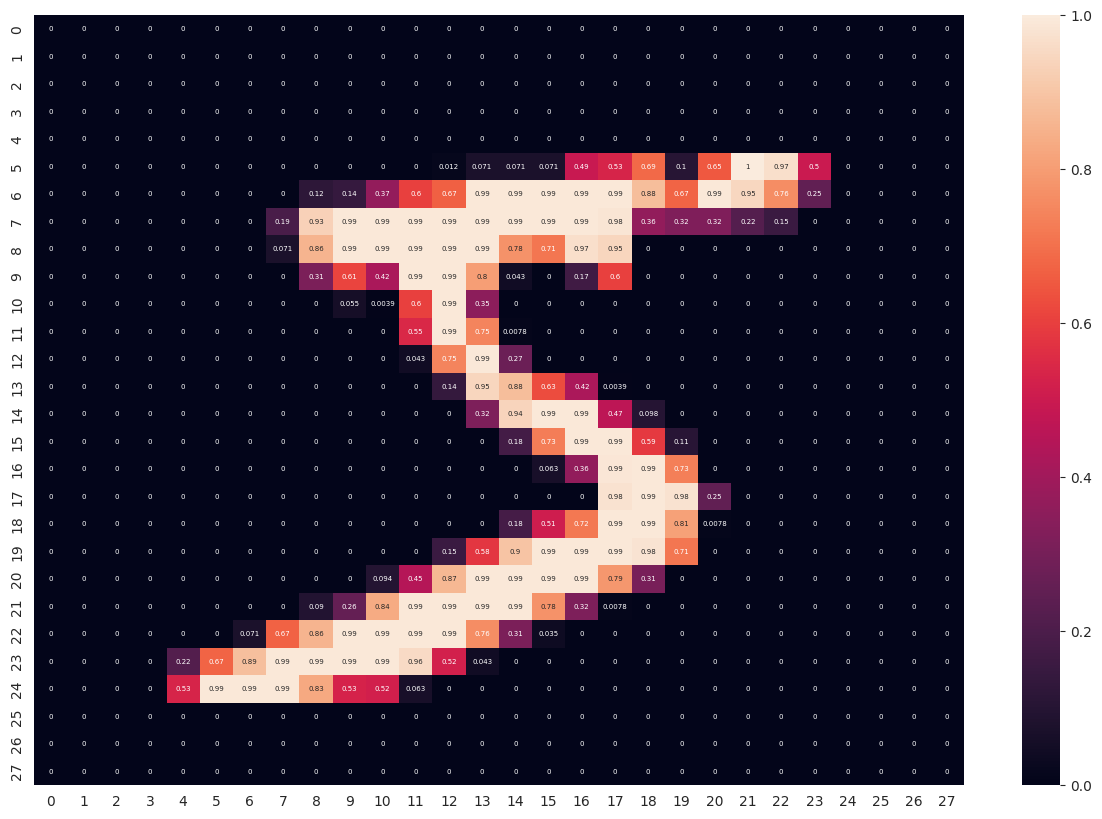

In [ ]:
# So we have to scale the image by dividing it by 255 since total pixel value range from 0 to 255.

Xtrain_scaled = Xtrain/255
Xtest_scaled = Xtest/255
plt.figure(figsize=(15,10))
sns.heatmap(Xtrain_scaled[0],annot=True,annot_kws={"size": 5})

# Image pixel close to 0 showing black color while image pixel close to 1 showing white color.
# Also lighter color pixel is better than darker color pixel for model training.

--------
## **Model Creation**
1) CNN (Convolutional Neural Network)

2) KNN (K-Nearest Neighbors)

3) SVM (Support Vector Machine)

### **1st Model: CNN (Convolutional Neural Network)**

In [ ]:
# Since image is grey scale so it should have one channel as 1, so we have to reshape it.

print('Xtrain_scaled shape:',Xtrain_scaled.shape)
print('Xtest_scaled shape:',Xtest_scaled.shape,'\n')
Xtrain_reshape = Xtrain_scaled.reshape(Xtrain_scaled.shape[0],Xtrain_scaled.shape[1],Xtrain_scaled.shape[2],1)
Xtest_reshape = Xtest_scaled.reshape(Xtest_scaled.shape[0],Xtest_scaled.shape[1],Xtest_scaled.shape[2],1)
print('Xtrain_reshape shape:',Xtrain_reshape.shape)
print('Xtest_reshape shape:',Xtest_reshape.shape)

Xtrain_scaled shape: (60000, 28, 28)
Xtest_scaled shape: (10000, 28, 28) 

Xtrain_reshape shape: (60000, 28, 28, 1)
Xtest_reshape shape: (10000, 28, 28, 1)


In [ ]:
# CNN parameters: Padding='same' because output shape is not affected.
#                 Activation='relu' is generally used in hidden layers, and activation= 'softmax' is used for multiclass classification.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
CNN = Sequential()
CNN.add(Conv2D(input_shape=(28,28,1),padding='same',activation='relu',kernel_size=(3,3),filters=16))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Conv2D(padding='same',activation='relu',kernel_size=(3,3),filters=32))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Flatten())
CNN.add(Dense(64,activation='relu'))
CNN.add(Dense(10,activation='softmax'))
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
# Since it is multiclass target so sparse_categorical_crossentropy will be applicable
CNN.compile(loss='sparse_categorical_crossentropy', optimizer ='adam',metrics = 'accuracy')

In [ ]:
# To check performance we run it for 9 epochs, with batch size of 30.
model=CNN.fit(Xtrain_reshape,Ytrain,batch_size=30,epochs=9,validation_data=(Xtest_reshape,Ytest),verbose=2,shuffle=True)

Epoch 1/9
2000/2000 - 8s - loss: 0.1545 - accuracy: 0.9528 - val_loss: 0.0530 - val_accuracy: 0.9837 - 8s/epoch - 4ms/step
Epoch 2/9
2000/2000 - 8s - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0383 - val_accuracy: 0.9881 - 8s/epoch - 4ms/step
Epoch 3/9
2000/2000 - 6s - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0348 - val_accuracy: 0.9884 - 6s/epoch - 3ms/step
Epoch 4/9
2000/2000 - 7s - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0325 - val_accuracy: 0.9888 - 7s/epoch - 4ms/step
Epoch 5/9
2000/2000 - 7s - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.0371 - val_accuracy: 0.9893 - 7s/epoch - 3ms/step
Epoch 6/9
2000/2000 - 7s - loss: 0.0162 - accuracy: 0.9943 - val_loss: 0.0390 - val_accuracy: 0.9885 - 7s/epoch - 4ms/step
Epoch 7/9
2000/2000 - 7s - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0402 - val_accuracy: 0.9877 - 7s/epoch - 3ms/step
Epoch 8/9
2000/2000 - 7s - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0336 - val_accuracy: 0.9906 - 7s/epoch - 4ms/step
Epoch 9/9
2000/2

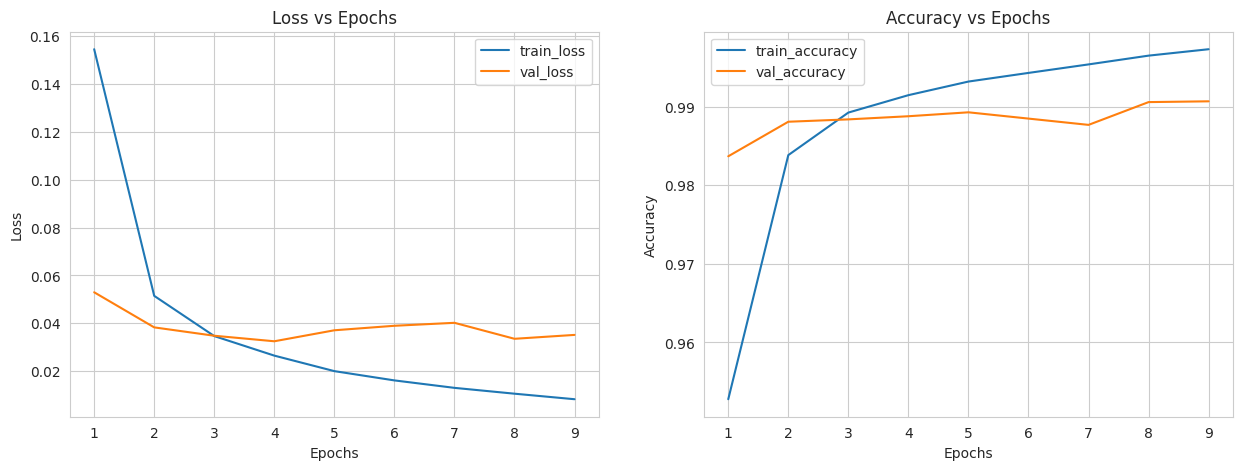

In [ ]:
# Graphical representation of (loss,val_loss) and (accuracy,val_accuracy)

plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.plot(range(1, 10), model.history["loss"],label='train_loss')
plt.plot(range(1, 10), model.history["val_loss"],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, 10), model.history["accuracy"],label='train_accuracy')
plt.plot(range(1, 10), model.history["val_accuracy"],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
# From the above graph we analyse that validation loss is minimum at 4 epochs, and from the accuracy is optimum at 4 epochs
# So, we decided to train our model again till 4 epochs only with batch size of 30.

CNN = Sequential()
CNN.add(Conv2D(input_shape=(28,28,1),padding='same',activation='relu',kernel_size=(3,3),filters=16))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Conv2D(padding='same',activation='relu',kernel_size=(3,3),filters=32))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Flatten())
CNN.add(Dense(64,activation='relu'))
CNN.add(Dense(10,activation='softmax'))
CNN.compile(loss='sparse_categorical_crossentropy', optimizer ='adam',metrics = 'accuracy')
model=CNN.fit(Xtrain_reshape,Ytrain,batch_size=30,epochs=4,validation_data=(Xtest_reshape,Ytest),verbose=2,shuffle=True)

Epoch 1/4
2000/2000 - 9s - loss: 0.1559 - accuracy: 0.9514 - val_loss: 0.0608 - val_accuracy: 0.9805 - 9s/epoch - 4ms/step
Epoch 2/4
2000/2000 - 7s - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0368 - val_accuracy: 0.9887 - 7s/epoch - 4ms/step
Epoch 3/4
2000/2000 - 7s - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0396 - val_accuracy: 0.9861 - 7s/epoch - 3ms/step
Epoch 4/4
2000/2000 - 8s - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0281 - val_accuracy: 0.9903 - 8s/epoch - 4ms/step


In [ ]:
score=CNN.evaluate(Xtest_reshape,Ytest)
print('Loss:',round(score[0]*100,2),'%','and','Accuracy',round(score[1]*100,2),'%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0281 - accuracy: 0.9903
Loss: 2.81 % and Accuracy 99.03 %


In [ ]:
# Result of CNN
data = [['Testing Accuracy', "{:.2f}%".format(score[1] * 100)]]
head = ['Result','CNN']
print(tabulate(data,headers=head, tablefmt='grid'))

+------------------+--------+
| Result           | CNN    |
+==================+========+
| Testing Accuracy | 99.03% |
+------------------+--------+


## **2nd Model: KNN (K-Nearest Neighbors)**

In [ ]:
# We have to flatten the dataset Xtrain,Xtest to convert into 2D for KNN

print('Xtrain shape:',Xtrain.shape)
Xtrain_flatten= Xtrain.reshape((60000, -1))
print('Xtrain_flatten shape:',Xtrain_flatten.shape,'\n')

print('Xtest shape:',Xtest.shape)
Xtest_flatten= Xtest.reshape((10000, -1))
print('Xtest_flatten shape:',Xtest_flatten.shape)

Xtrain shape: (60000, 28, 28)
Xtrain_flatten shape: (60000, 784) 

Xtest shape: (10000, 28, 28)
Xtest_flatten shape: (10000, 784)


In [ ]:
# Now we have to scale it by dividing it by 255

Xtrain_df = pd.DataFrame(Xtrain_flatten/255)
Xtest_df = pd.DataFrame(Xtest_flatten/255)

In [ ]:
pd.set_option('display.max_columns',None)
print(Xtrain_df.shape)
Xtrain_df.head()
# We can see data has been scaled

(60000, 784)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.070588,0.070588,0.070588,0.494118,0.533333,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.117647,0.141176,0.368627,0.603922,0.666667,0.992157,0.992157,0.992157,0.992157,0.992157,0.882353,0.674510,0.992157,0.949020,0.764706,0.25098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
print(Xtest_df.shape)
Xtest_df.head()

(10000, 784)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
error_rate=[]
for i in range(1,12):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(Xtrain_df,Ytrain)
    Ypred=KNN.predict(Xtest_df)
    accuracy.append(accuracy_score(Ytest,Ypred))
    error_rate.append(np.mean(Ytest!=Ypred))

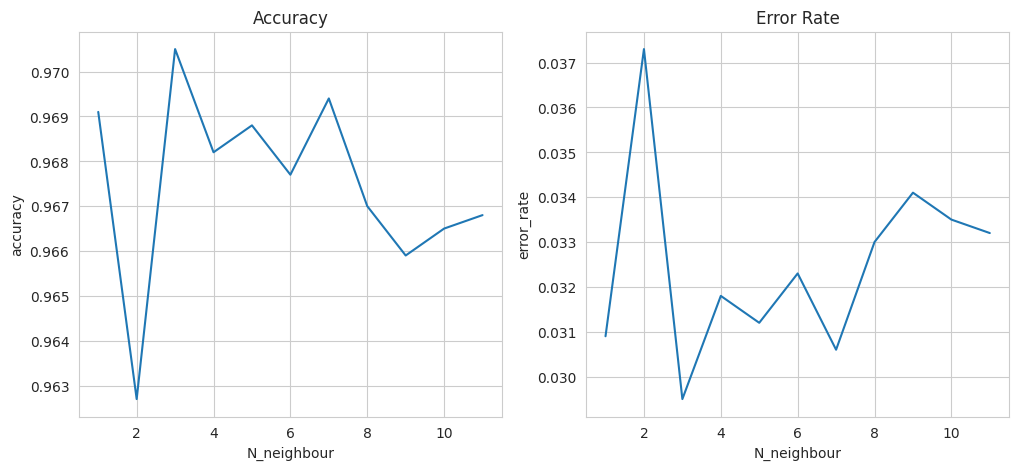

In [ ]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')

plt.subplot(1,2,1)
plt.plot(range(1,12),accuracy)
plt.xlabel('N_neighbour')
plt.ylabel('accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(1,12),error_rate)
plt.xlabel('N_neighbour')
plt.ylabel('error_rate')
plt.title('Error Rate')
plt.show()

In [ ]:
# From the graph above n_neighnors=3 gives optimum level of accuracy with less error rate.

KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain_df,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediction of test data
Ypred=KNN.predict(Xtest_df)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# To check overfitted or not

Ypred=KNN.predict(Xtrain_df)
print(classification_report(Ytrain,Ypred))

# It is not overfitted because testing accuracy is 97% and training accuracy is 99%.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.98      1.00      0.99      6742
           2       0.99      0.98      0.99      5958
           3       0.99      0.98      0.99      6131
           4       0.99      0.98      0.99      5842
           5       0.99      0.98      0.99      5421
           6       0.99      1.00      0.99      5918
           7       0.98      0.99      0.99      6265
           8       0.99      0.97      0.98      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [ ]:
# Result of KNN
data = [['Testing Accuracy:','97%'],['Training Accuracy(%):','99%']]
head = ['Result','KNN']
print(tabulate(data,headers=head, tablefmt='grid'))

+-----------------------+-------+
| Result                | KNN   |
+=======================+=======+
| Testing Accuracy:     | 97%   |
+-----------------------+-------+
| Training Accuracy(%): | 99%   |
+-----------------------+-------+


# **3rd Model: SVM (Support Vector Machine)**

In [ ]:
# For SVM we also have to Flatten dataset same as KNN

print('Xtrain_df shape:',Xtrain_df.shape)
print('Xtest_df shape:',Xtest_df.shape)

Xtrain_df shape: (60000, 784)
Xtest_df shape: (10000, 784)


In [ ]:
# For Multiclass classification we have to use ovr(one-versus-rest)

from sklearn.svm import SVC
SVC = SVC(kernel='linear',C=1.0,decision_function_shape='ovr')
SVC.fit(Xtrain_df,Ytrain)

SVC(kernel='linear')

In [ ]:
# Prediction of test data
Ypred=SVC.predict(Xtest_df)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
# To check overfitted or not

Ypred=KNN.predict(Xtrain_df)
print(classification_report(Ytrain,Ypred))

# It is not overfitted because testing accuracy is 94% while training accuracy is 99%.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.98      1.00      0.99      6742
           2       0.99      0.98      0.99      5958
           3       0.99      0.98      0.99      6131
           4       0.99      0.98      0.99      5842
           5       0.99      0.98      0.99      5421
           6       0.99      1.00      0.99      5918
           7       0.98      0.99      0.99      6265
           8       0.99      0.97      0.98      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [ ]:
# Result of SVM
data = [['Testing Accuracy:','94%'],['Training Accuracy:','99%']]
head = ['Result','SVM']
print(tabulate(data,headers=head, tablefmt='grid'))

+--------------------+-------+
| Result             | SVM   |
+====================+=======+
| Testing Accuracy:  | 94%   |
+--------------------+-------+
| Training Accuracy: | 99%   |
+--------------------+-------+


-------
## **Model Comparison Report**:

In [ ]:
data = [['CNN',"{:.2f}%".format(score[1]*100),'1st(BEST)'],['KNN','97%','2nd'],['SVM','94%','3rd']]
head = ['Model Name','Testing Accuracy','Ranking order']
print(tabulate(data,headers=head, tablefmt='grid'))

# Best model for this dataset is CNN(Convolutional Neural Network) with 98.51% accuray.

+--------------+--------------------+-----------------+
| Model Name   | Testing Accuracy   | Ranking order   |
+==============+====================+=================+
| CNN          | 99.03%             | 1st(BEST)       |
+--------------+--------------------+-----------------+
| KNN          | 97%                | 2nd             |
+--------------+--------------------+-----------------+
| SVM          | 94%                | 3rd             |
+--------------+--------------------+-----------------+


--------
## **Challenges faced**:

No such challenges we have to faced because it is MNIST dataset, So No EDA we need to perform.

-----------